<a href="https://colab.research.google.com/github/Peksyaji/Data_Mining_and_BI/blob/main/DatMin1_EDA%26Visualisasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df1 = pd.read_csv('https://raw.githubusercontent.com/ammardaffa/Data-Mining-1/main/data/bekasi.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/ammardaffa/Data-Mining-1/main/data/bogor.csv')
df3 = pd.read_csv('https://raw.githubusercontent.com/ammardaffa/Data-Mining-1/main/data/depok.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/ammardaffa/Data-Mining-1/main/data/jakarta.csv')
df5 = pd.read_csv('https://raw.githubusercontent.com/ammardaffa/Data-Mining-1/main/data/tangerang.csv')

# Bekasi

## Preprocessing

In [3]:
df1.sample(8)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   107 non-null    object 
 1   LT           107 non-null    float64
 2   LB           107 non-null    float64
 3   KT           107 non-null    float64
 4   KM           106 non-null    float64
 5   garasi       33 non-null     float64
 6   carport      81 non-null     float64
 7   lokasi       107 non-null    object 
 8   sertifikat   106 non-null    object 
 9   listrik      101 non-null    float64
 10  hadap        48 non-null     object 
 11  harga        107 non-null    float64
 12  URL          107 non-null    object 
 13  deskripsi    107 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [5]:
# Menghapus kolom yang semua barisnya NaN
df1.dropna(axis=1, how='all', inplace=True)

# Menghapus baris yang semua kolomnya NaN
df1.dropna(axis=0, how='all', inplace=True)

df1.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...


In [6]:
# Menghitung banyaknya data terduplikat
df1.duplicated().sum()

0

In [7]:
# Menghitung data NaN tiap kolom
df1.isna().sum()

created_at     0
LT             0
LB             0
KT             0
KM             1
garasi        74
carport       26
lokasi         0
sertifikat     1
listrik        6
hadap         59
harga          0
URL            0
deskripsi      0
dtype: int64

In [8]:
# Menghitung presentase data NaN tiap kolom
(df1.isna().sum()/len(df1)*100).to_frame('presentase missing')

,presentase missing
created_at,0.000000
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.934579
garasi,69.158879
carport,24.299065
lokasi,0.000000
sertifikat,0.934579
listrik,5.607477


In [9]:
'''
Karena dirasa sudah tidak diperlukan, kolom 'created_at', 'garasi',
'carport', 'hadap', 'URL' dan 'deskripsi' dihapus
'''
df1.drop(['created_at','garasi','carport','hadap','URL','deskripsi'],
         axis=1, inplace=True)

In [10]:
print('LT: ',len(set(df1.LT)), set(df1.LT))
print('LB: ',len(set(df1.LB)), set(df1.LB))
print('KT: ',len(set(df1.KT)), set(df1.KT))
print('KM: ',len(set(df1.KM)), set(df1.KM))
print('Lokasi: ',len(set(df1.lokasi)), set(df1.lokasi))
print('Sertifikat: ',len(set(df1.sertifikat)), set(df1.sertifikat))
print('Listrik: ',len(set(df1.listrik)), set(df1.listrik))

LT:  49 {135.0, 140.0, 143.0, 144.0, 145.0, 150.0, 153.0, 156.0, 160.0, 36.0, 296.0, 50.0, 180.0, 54.0, 59.0, 60.0, 63.0, 320.0, 65.0, 66.0, 71.0, 72.0, 200.0, 75.0, 77.0, 78.0, 336.0, 81.0, 84.0, 85.0, 88.0, 90.0, 91.0, 94.0, 96.0, 97.0, 100.0, 101.0, 102.0, 105.0, 108.0, 364.0, 110.0, 112.0, 245.0, 117.0, 119.0, 124.0, 126.0}
LB:  53 {130.0, 132.0, 135.0, 140.0, 141.0, 143.0, 144.0, 145.0, 150.0, 157.0, 30.0, 32.0, 160.0, 36.0, 293.0, 168.0, 40.0, 170.0, 43.0, 300.0, 45.0, 47.0, 50.0, 180.0, 53.0, 55.0, 60.0, 63.0, 66.0, 68.0, 69.0, 70.0, 200.0, 72.0, 75.0, 80.0, 84.0, 85.0, 90.0, 220.0, 95.0, 96.0, 100.0, 230.0, 102.0, 105.0, 110.0, 494.0, 112.0, 117.0, 119.0, 120.0, 250.0}
KT:  7 {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}
KM:  5 {nan, 1.0, 2.0, 3.0, 4.0}
Lokasi:  2 {'Kabupaten Bekasi', 'Kota Bekasi'}
Sertifikat:  4 {nan, 'SHM,IMB', 'HGB', 'SHM'}
Listrik:  13 {nan, nan, nan, nan, 900.0, 3300.0, nan, nan, 3500.0, 4400.0, 1300.0, 2200.0, 5500.0}


In [11]:
# Mengubah tipe variabel menjadi kategorik
df1['KT'] = df1['KT'].astype('category')
df1['KM'] = df1['KM'].astype('category')
df1['lokasi'] = df1['lokasi'].astype('category')
df1['sertifikat'] = df1['sertifikat'].astype('category')
df1['listrik'] = df1['listrik'].astype('category')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 0 to 106
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          107 non-null    float64 
 1   LB          107 non-null    float64 
 2   KT          107 non-null    category
 3   KM          106 non-null    category
 4   lokasi      107 non-null    category
 5   sertifikat  106 non-null    category
 6   listrik     101 non-null    category
 7   harga       107 non-null    float64 
dtypes: category(5), float64(3)
memory usage: 5.0 KB


## EDA & Visualisasi

In [13]:
# Statistika deskriptif
df1.describe(include='all')

,LT,LB,KT,KM,lokasi,sertifikat,listrik,harga
count,107.000000,107.000000,107.0,106.0,107,106,101.0,1.070000e+02
unique,NaN,NaN,7.0,4.0,2,3,7.0,NaN
top,NaN,NaN,3.0,2.0,Kota Bekasi,SHM,2200.0,NaN
freq,NaN,NaN,39.0,42.0,73,95,53.0,NaN
mean,108.822430,110.635514,NaN,NaN,NaN,NaN,NaN,1.074823e+09
std,59.164914,71.755270,NaN,NaN,NaN,NaN,NaN,7.516152e+08
min,36.000000,30.000000,NaN,NaN,NaN,NaN,NaN,1.600000e+08
25%,72.000000,60.000000,NaN,NaN,NaN,NaN,NaN,5.805000e+08
50%,91.000000,90.000000,NaN,NaN,NaN,NaN,NaN,9.200000e+08
75%,130.500000,144.000000,NaN,NaN,NaN,NaN,NaN,1.350000e+09


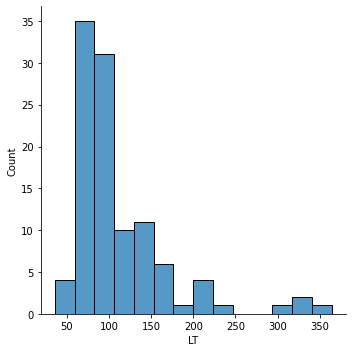

In [14]:
# Distribusi 'luas tanah'
sns.displot(data=df1, x='LT', kind='hist')

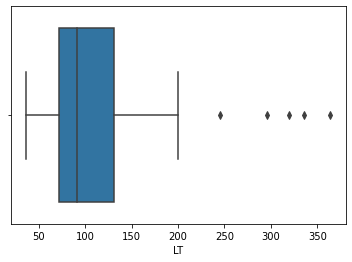

In [15]:
sns.boxplot(data=df1, x='LT')

In [16]:
# Bangunan dengan luas tanah di atas 200 m2
df1.loc[df1['LT']>200,:]

,LT,LB,KT,KM,lokasi,sertifikat,listrik,harga
7,336.0,200.0,4.0,3.0,Kabupaten Bekasi,HGB,5500.0,4.200000e+09
15,245.0,117.0,3.0,2.0,Kota Bekasi,SHM,2200.0,2.750000e+09
16,296.0,200.0,4.0,2.0,Kota Bekasi,SHM,5500.0,2.300000e+09
76,364.0,494.0,5.0,NaN,Kota Bekasi,NaN,NaN,2.485000e+09
99,320.0,300.0,3.0,3.0,Kota Bekasi,SHM,2200.0,2.500000e+09


In [17]:
# Bangunan dengan luas tanah di bawah 50 m2
df1.loc[df1['LT']<50,:]

,LT,LB,KT,KM,lokasi,sertifikat,listrik,harga
105,36.0,60.0,2.0,1.0,Kabupaten Bekasi,SHM,1300.0,300000000.0


Dari dua plot di atas, terlihat bahwa luas tanah peumahan di daerah Bekasi berkisar antara 36-364 meter persegi dengan mayoritas seluas 50-100 meter persegi. Terdapat juga beberapa rumah dengan luas tanah di atas 200 meter persegi.

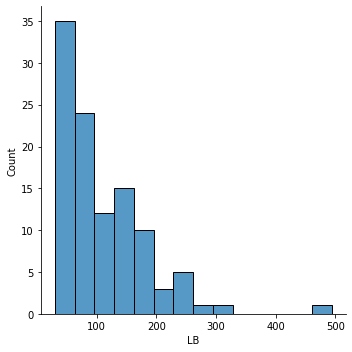

In [18]:
 # Distribusi luas bangunan
 sns.displot(data=df1, x='LB', kind='hist')

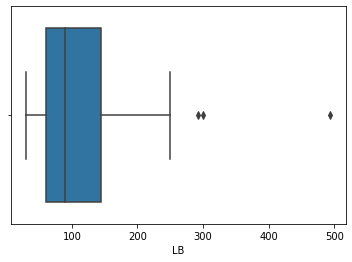

In [19]:
sns.boxplot(data=df1, x='LB')

In [20]:
df1.loc[df1['LB']>200,:]

,LT,LB,KT,KM,lokasi,sertifikat,listrik,harga
5,160.0,230.0,4.0,4.0,Kabupaten Bekasi,SHM,5500.0,1.850000e+09
17,200.0,250.0,4.0,3.0,Kota Bekasi,SHM,2200.0,2.300000e+09
31,200.0,293.0,6.0,4.0,Kota Bekasi,SHM,5500.0,4.500000e+09
33,200.0,250.0,4.0,3.0,Kota Bekasi,SHM,2200.0,2.300000e+09
76,364.0,494.0,5.0,NaN,Kota Bekasi,NaN,NaN,2.485000e+09
95,200.0,250.0,4.0,3.0,Kota Bekasi,SHM,2200.0,2.300000e+09
99,320.0,300.0,3.0,3.0,Kota Bekasi,SHM,2200.0,2.500000e+09
102,180.0,220.0,5.0,3.0,Kota Bekasi,SHM,2200.0,1.600000e+09
103,140.0,250.0,3.0,2.0,Kabupaten Bekasi,SHM,2200.0,8.500000e+08


Dari dua plot di atas, diketahui bahwa mayoritas luas bangunan di daerah Bekasi adalah dibawah 100 meter persegi. Ada pula beberapa bangunan dengan luas bangunan lebih dari 200 meter persegi.

Terdapat keanehan pada data luas bangunan dan luas tanah karena terdapat data luas bangunan lebih luas daripada luas tanah. Saya asumsikan bahwa bangunan dengan luas bangunan lebih besar daripada luas tanahnya, maka bangunan tersebut memiliki lebih dari satu lantai.


/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


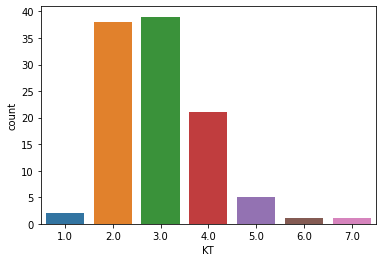

In [21]:
sns.countplot(data=df1, x='KT')

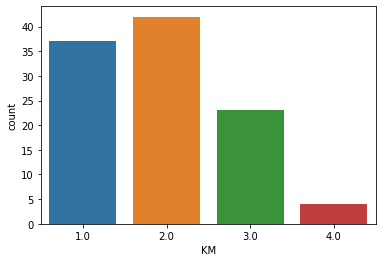

In [22]:
sns.countplot(data=df1, x='KM')

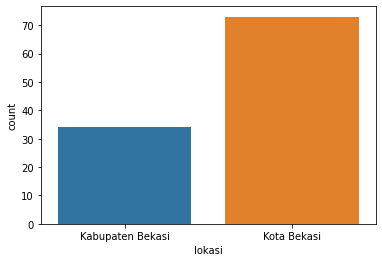

In [23]:
sns.countplot(data=df1, x='lokasi')

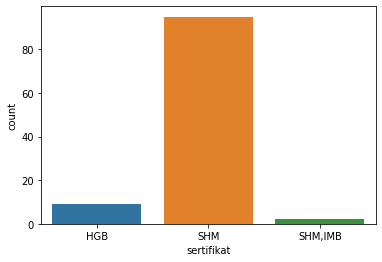

In [24]:
sns.countplot(data=df1, x='sertifikat')

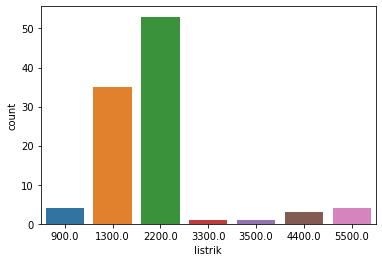

In [25]:
sns.countplot(data=df1, x='listrik')

*   Jumlah kamar tidur pada perumahan di daerah Bekasi biasanya sebanyak 2 atau 3 kamar.
*   Sementara itu, setip rumah biasanya terdapat 1 atau 2 kamar mandi.
*   Rumah di sini juga mayoritas telah memiliki SHM dan menggunakan listrik berdaya 1300 atau 2200 watt.

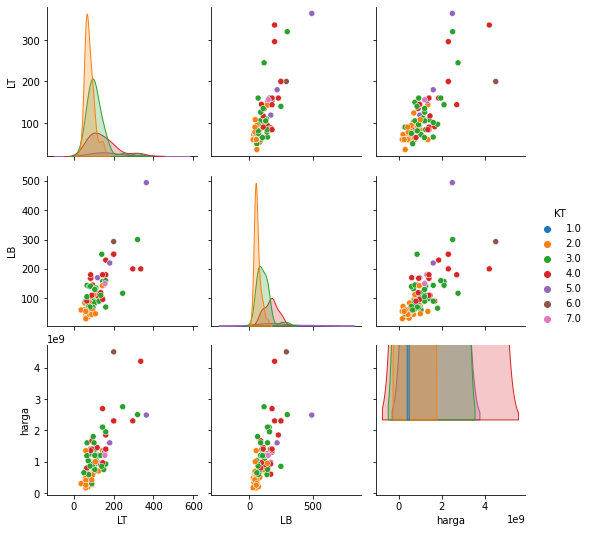

In [26]:
sns.pairplot(df1, hue='KT')

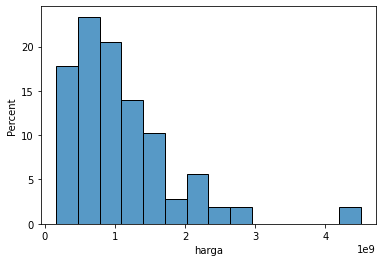

In [27]:
sns.histplot(data=df1, x='harga', stat='percent')

# Bogor

## Preprocessing

In [28]:
df2.sample(8)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,05-12-2021,90.0,69.0,2.0,2.0,0.0,1.0,Cileungsi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,07-12-2021,66.0,37.0,2.0,1.0,0.0,1.0,Ciseeng,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,05-12-2021,66.0,45.0,2.0,1.0,1.0,1.0,Bogor Barat,SHGB,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [30]:
# Menghapus kolom yang berisi NaN di semua barisnya
df2.dropna(axis=1, how='all', inplace=True)

# Menghapus baris yang berisi NaN di semua kolomnya
df2.dropna(axis=0, how='all', inplace=True)

df2.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
188,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat taman buah mekarsari, dekat rumah sakit"
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah siap huni
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09,https://www.rumah.com/listing-properti/dijual-...,Cuma 10 menit ke kota
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat rumah sakit, dekat pasar"
192,03-12-2021,72.0,90.0,3.0,2.0,1.0,1.0,Cibinong,SHM,2200.0,NaN,9.000000e+08,https://www.rumah.com/listing-properti/dijual-...,"Nyaman, aman, swimming pool"


In [31]:
# Menghitung banyaknya data terduplikat
df2.duplicated().sum()

0

In [32]:
# Menghitung data NaN tiap kolom
df2.isna().sum()

created_at      0
LT              0
LB              0
KT              0
KM              0
garasi          0
carport         0
lokasi          0
sertifikat      0
listrik         0
hadap         174
harga           0
URL             0
deskripsi       0
dtype: int64

In [33]:
# Menghitung presentase data NaN tiap kolom
(df2.isna().sum()/len(df2)*100).to_frame('presentase missing')

,presentase missing
created_at,0.00000
LT,0.00000
LB,0.00000
KT,0.00000
KM,0.00000
garasi,0.00000
carport,0.00000
lokasi,0.00000
sertifikat,0.00000
listrik,0.00000


In [34]:
# Karena dirasa sudah tidak diperlukan, kolom 'created_at', 'URL' dan 'deskripsi' dihapus
df2.drop(['created_at','URL','deskripsi'], axis=1, inplace=True)

In [35]:
print('LT: ',len(set(df2.LT)), set(df2.LT))
print('LB: ',len(set(df2.LB)), set(df2.LB))
print('KT: ',len(set(df2.KT)), set(df2.KT))
print('KM: ',len(set(df2.KM)), set(df2.KM))
print('Garasi: ',len(set(df2.garasi)), set(df2.garasi))
print('Carport: ',len(set(df2.carport)), set(df2.carport))
print('Lokasi: ',len(set(df2.lokasi)), set(df2.lokasi))
print('Sertifikat: ',len(set(df2.sertifikat)), set(df2.sertifikat))
print('Listrik: ',len(set(df2.listrik)), set(df2.listrik))
print('Hadap: ',len(set(df2.hadap)), set(df2.hadap))

LT:  73 {1272.0, 128.0, 131.0, 140.0, 270.0, 142.0, 144.0, 276.0, 150.0, 280.0, 156.0, 30.0, 800.0, 162.0, 1058.0, 38.0, 167.0, 168.0, 175.0, 50.0, 180.0, 437.0, 312.0, 696.0, 314.0, 699.0, 60.0, 698.0, 62.0, 188.0, 313.0, 65.0, 66.0, 195.0, 196.0, 320.0, 70.0, 67.0, 72.0, 200.0, 74.0, 75.0, 78.0, 79.0, 80.0, 81.0, 338.0, 210.0, 84.0, 206.0, 470.0, 89.0, 90.0, 91.0, 1500.0, 220.0, 93.0, 345.0, 97.0, 98.0, 867.0, 100.0, 102.0, 105.0, 106.0, 107.0, 108.0, 112.0, 240.0, 119.0, 120.0, 125.0, 255.0}
LB:  67 {129.0, 130.0, 260.0, 650.0, 400.0, 21.0, 150.0, 24.0, 25.0, 283.0, 30.0, 287.0, 160.0, 33.0, 32.0, 31.0, 36.0, 164.0, 38.0, 39.0, 40.0, 169.0, 170.0, 43.0, 300.0, 45.0, 37.0, 47.0, 1200.0, 48.0, 50.0, 51.0, 49.0, 54.0, 55.0, 58.0, 60.0, 62.0, 63.0, 65.0, 66.0, 68.0, 69.0, 70.0, 198.0, 72.0, 200.0, 202.0, 75.0, 79.0, 80.0, 42.0, 340.0, 213.0, 89.0, 90.0, 219.0, 350.0, 100.0, 358.0, 108.0, 240.0, 500.0, 120.0, 250.0, 125.0, 126.0}
KT:  7 {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0}
KM:  6 {1.0, 2.

In [36]:
# Mengubah tipe variabel menjadi kategorik
df2['KT'] = df2['KT'].astype('category')
df2['KM'] = df2['KM'].astype('category')
df2['garasi'] = df2['garasi'].astype('category')
df2['carport'] = df2['carport'].astype('category')
df2['sertifikat'] = df2['sertifikat'].astype('category')
df2['listrik'] = df2['listrik'].astype('category')
df2['hadap'] = df2['hadap'].astype('category')

In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          193 non-null    float64 
 1   LB          193 non-null    float64 
 2   KT          193 non-null    category
 3   KM          193 non-null    category
 4   garasi      193 non-null    category
 5   carport     193 non-null    category
 6   lokasi      193 non-null    object  
 7   sertifikat  193 non-null    category
 8   listrik     193 non-null    category
 9   hadap       19 non-null     category
 10  harga       193 non-null    float64 
dtypes: category(7), float64(3), object(1)
memory usage: 10.8+ KB


## EDA & Visualisasi

In [38]:
df2.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
count,193.000000,193.000000,193.0,193.0,193.0,193.0,193,193,193.0,19,1.930000e+02
unique,NaN,NaN,7.0,6.0,4.0,8.0,27,3,8.0,7,NaN
top,NaN,NaN,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,Selatan,NaN
freq,NaN,NaN,108.0,106.0,172.0,140.0,26,155,100.0,5,NaN
mean,143.575130,98.663212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.289362e+09
std,191.576208,125.851746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.115854e+09
min,30.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.500000e+07
25%,66.000000,36.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.990000e+08
50%,84.000000,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.700000e+08
75%,120.000000,90.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.250000e+09


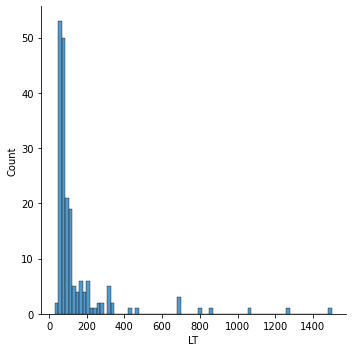

In [39]:
# Distribusi 'luas tanah'
sns.displot(data=df2, x='LT', kind='hist')

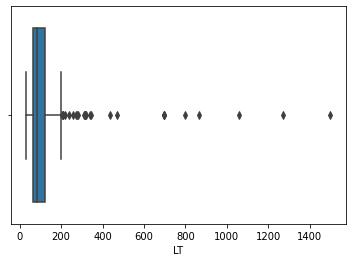

In [40]:
sns.boxplot(data=df2, x='LT')

In [41]:
df2.loc[df2['LT']>200, :]

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
10,312.0,70.0,4.0,2.0,1.0,1.0,Tanah Sareal,SHM,2200.0,Timur,2.500000e+08
26,1500.0,1200.0,8.0,6.0,0.0,8.0,Cileungsi,SHM,17600.0,NaN,9.900000e+09
27,699.0,350.0,5.0,5.0,0.0,2.0,Babakan Madang,SHM,3500.0,NaN,7.300000e+09
36,314.0,300.0,4.0,4.0,1.0,7.0,Bogor Timur,SHM,3500.0,NaN,2.900000e+09
37,1272.0,500.0,4.0,5.0,0.0,2.0,Babakan Madang,SHM,5500.0,NaN,1.500000e+10
40,338.0,250.0,4.0,3.0,0.0,2.0,Babakan Madang,SHM,3500.0,NaN,3.700000e+09
86,210.0,150.0,4.0,2.0,0.0,2.0,Ciomas,SHM,2200.0,NaN,1.400000e+09
88,255.0,219.0,6.0,5.0,0.0,2.0,Bogor Utara,SHM,2200.0,NaN,2.500000e+09
92,270.0,150.0,5.0,4.0,0.0,1.0,Bogor Timur,SHM,2200.0,NaN,1.850000e+09
93,240.0,358.0,4.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,4.500000e+09


Luas tanah pada perumahan yang ada di Bogor kebanyakan berkisar antara 30-120 meter persegi. Terdapat cukup banyak outlier yang dapat dilakukan analisis lebih lanjut.

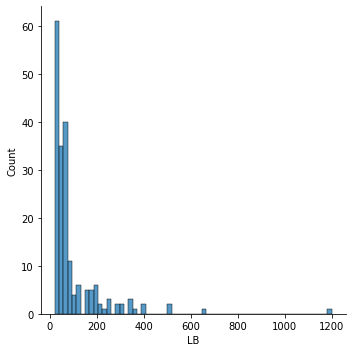

In [42]:
# Distribusi 'luas bangunan'
sns.displot(data=df2, x='LB', kind='hist')

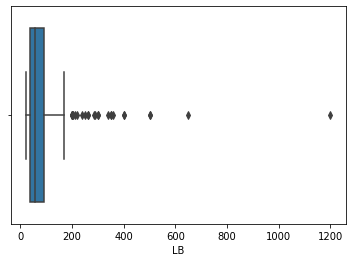

In [43]:
sns.boxplot(data=df2, x='LB')

Sejalan dengan luas tanah, pada variabel luas bangunan juga terdapat banyak outlier yang dapat dianalisis lebih lanjut. Sementara itu, luas bangunan di daerah ini mayoritas berkisar antara 36-100 meter persegi.

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


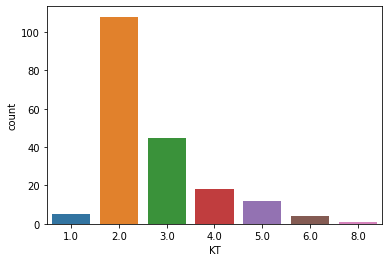

In [44]:
sns.countplot(data=df2, x='KT')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


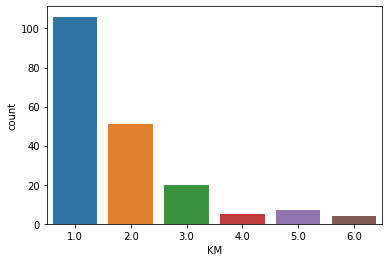

In [45]:
sns.countplot(data=df2, x='KM')

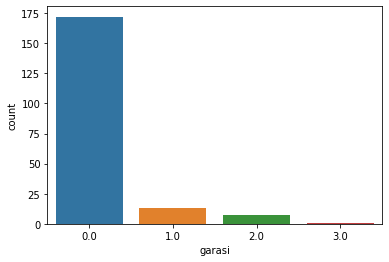

In [46]:
sns.countplot(data=df2, x='garasi')

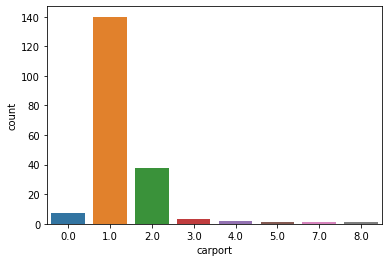

In [47]:
sns.countplot(data=df2, x='carport')

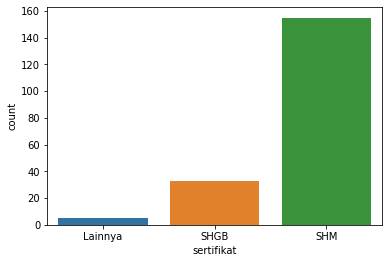

In [48]:
sns.countplot(data=df2, x='sertifikat')

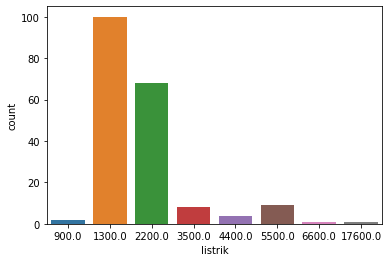

In [49]:
sns.countplot(data=df2, x='listrik')

Dari output countplot di atas diperoleh informasi sebagai berikut:
* Biasanya rumah di daerah ini memiliki kamar sebanyak 2 atau 3 kamar
* Sedangkan untuk kamar mandinya biasanya ada sebanyak 1-2 kamar mandi
* Mayoritas tidak memiliki garasi, tetapi ada 1-2 carport
* Bangunan di sini sebagian besar telah memiliki sertifikat SHM
* Listrik yang digunakan mayoritas berdaya 1300-2200 watt

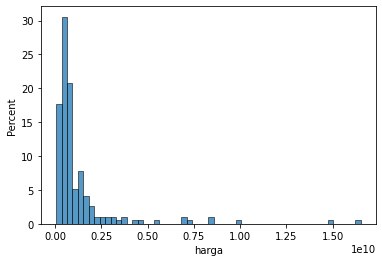

In [50]:
sns.histplot(data=df2, x='harga', stat='percent')

# Depok

## Preprocessing

In [51]:
df3.sample(8)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,5-12-2021,112,109.0,3.0,4.0,NaN,NaN,Sawangan,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,5-12-2021,1024,400.0,7.0,5.0,6.0,6.0,Cinere,SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [53]:
# Menghapus kolom yang berisi NaN di semua barisnya
df3.dropna(axis=1, how='all', inplace=True)

# Menghapus baris yang berisi NaN di semua kolomnya
df3.dropna(axis=0, how='all', inplace=True)

df3.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Timur,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,Selatan,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...
117,4-12-2021,100,15.0,3.0,3.0,1.0,1.0,Cinere,SHM,3500.0,NaN,1750.0,https://www.rumah123.com/properti/depok/hos928...,Dijual cepat rumah bagus siap huni
120,NOTE:,- lokasi yang kami gunakan hanya per kecamatan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,-harga yang kami gunakan adalah per satuan juta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# Menghitung banyaknya data terduplikat
df3.duplicated().sum()

0

In [55]:
# Menghitung data NaN tiap kolom
df3.isna().sum()

created_at     1
LT             0
LB             2
KT             2
KM             2
garasi        95
carport       26
lokasi         2
sertifikat     2
listrik       17
hadap         58
harga          2
URL            2
deskripsi      2
dtype: int64

In [56]:
# Menghitung presentase data NaN tiap kolom
(df3.isna().sum()/len(df3)*100).to_frame('presentase missing')

,presentase missing
created_at,0.833333
LT,0.000000
LB,1.666667
KT,1.666667
KM,1.666667
garasi,79.166667
carport,21.666667
lokasi,1.666667
sertifikat,1.666667
listrik,14.166667


In [57]:
# Karena dirasa sudah tidak diperlukan, kolom 'created_at', 'URL' dan 'deskripsi' dihapus
df3.drop(['created_at','URL','deskripsi'], axis=1, inplace=True)

In [58]:
print('LT: ',len(set(df3.LT)), set(df3.LT))
print('LB: ',len(set(df3.LB)), set(df3.LB))
print('KT: ',len(set(df3.KT)), set(df3.KT))
print('KM: ',len(set(df3.KM)), set(df3.KM))
print('Garasi: ',len(set(df3.garasi)), set(df3.garasi))
print('Carport: ',len(set(df3.carport)), set(df3.carport))
print('Lokasi: ',len(set(df3.lokasi)), set(df3.lokasi))
print('Sertifikat: ',len(set(df3.sertifikat)), set(df3.sertifikat))
print('Listrik: ',len(set(df3.listrik)), set(df3.listrik))
print('Hadap: ',len(set(df3.hadap)), set(df3.hadap))

LT:  58 {'81', '50', '87', '63', '1024', '104', '82', '76', '55', '66', '71', '84', '40', '151', '110', '96', '85', '-harga yang kami gunakan adalah per satuan juta', '120', '105', '51', '- lokasi yang kami gunakan hanya per kecamatan', '70', '54', '83', '885', '249', '335', '72', '210', '62', '94', '88', '74', '100', '78', '880', '65', '378', '112', '185', '60', '165', '92', '45', '200', '97', '75', '77', '64', '59', '47', '487', '79', '36', '400', '80', '57'}
LB:  51 {nan, nan, 130.0, 260.0, 140.0, 15.0, 400.0, 150.0, 30.0, 160.0, 289.0, 36.0, 40.0, 42.0, 300.0, 45.0, 46.0, 47.0, 48.0, 50.0, 51.0, 180.0, 54.0, 55.0, 56.0, 58.0, 60.0, 61.0, 62.0, 63.0, 66.0, 450.0, 68.0, 70.0, 71.0, 200.0, 72.0, 73.0, 75.0, 77.0, 80.0, 600.0, 226.0, 100.0, 103.0, 105.0, 109.0, 110.0, 115.0, 120.0, 250.0}
KT:  8 {nan, nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0}
KM:  7 {nan, 1.0, 2.0, 3.0, 4.0, 5.0, nan}
Garasi:  99 {nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.0, nan, nan, nan, nan, 3.0, 2.0, nan, n

In [59]:
df3.drop([120,121],axis=0, inplace=True)

In [60]:
# M<engubah tipe variabel menjadi numerik
df3['LT'] = df3['LT'].astype('float')
# Mengubah tipe variabel menjadi kategorik
df3['KT'] = df3['KT'].astype('category')
df3['KM'] = df3['KM'].astype('category')
df3['sertifikat'] = df3['sertifikat'].astype('category')
df3['listrik'] = df3['listrik'].astype('category')
df3['hadap'] = df3['hadap'].astype('category')

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          118 non-null    float64 
 1   LB          118 non-null    float64 
 2   KT          118 non-null    category
 3   KM          118 non-null    category
 4   garasi      25 non-null     float64 
 5   carport     94 non-null     float64 
 6   lokasi      118 non-null    object  
 7   sertifikat  118 non-null    category
 8   listrik     103 non-null    category
 9   hadap       62 non-null     category
 10  harga       118 non-null    float64 
dtypes: category(5), float64(5), object(1)
memory usage: 8.2+ KB


## EDA & Visualisai

In [62]:
df3.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
count,118.000000,118.000000,118.0,118.0,25.000000,94.000000,118,118,103.0,62,118.000000
unique,NaN,NaN,6.0,5.0,NaN,NaN,11,2,9.0,6,NaN
top,NaN,NaN,2.0,2.0,NaN,NaN,Sawangan,SHM,2200.0,Utara,NaN
freq,NaN,NaN,58.0,56.0,NaN,NaN,30,116,62.0,19,NaN
mean,119.872881,92.618644,NaN,NaN,1.760000,1.670213,NaN,NaN,NaN,NaN,1194.440678
std,171.402388,92.630404,NaN,NaN,1.392839,1.061428,NaN,NaN,NaN,NaN,1474.387409
min,36.000000,15.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,41.000000
25%,60.000000,46.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,485.000000
50%,72.000000,61.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,810.000000
75%,100.000000,102.250000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1137.500000


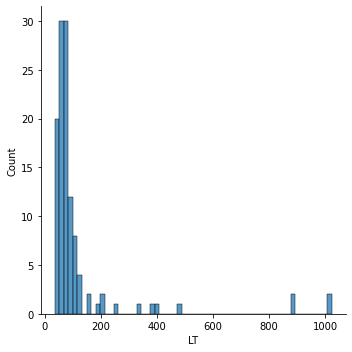

In [63]:
# Distribusi 'luas tanah'
sns.displot(data=df3, x='LT', kind='hist')

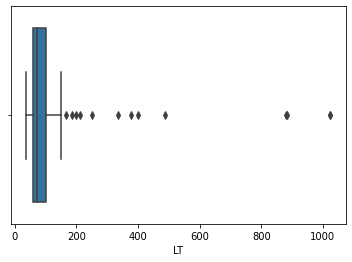

In [64]:
sns.boxplot(data=df3, x='LT')

Terlihat bahwa luas tanah di daerah ini mayoritas di bawah 100 meter persegi dengan beberapa bangunan memiliki luas tanah di sebelah kanan ekor kanan boxplot. Bahkan, ada bangunan dengan luas tanah melebihi 1000 meter persegi.

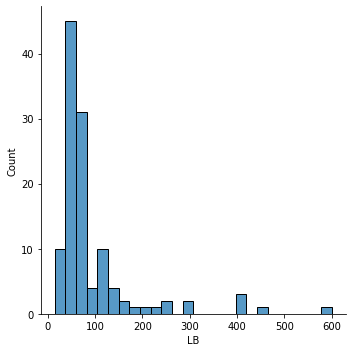

In [65]:
# Distribusi 'luas bangunan'
sns.displot(data=df3, x='LB', kind='hist')

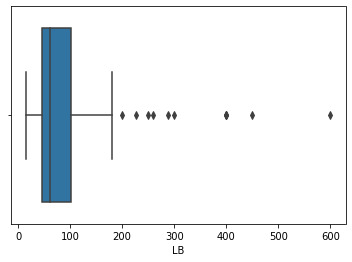

In [66]:
sns.boxplot(data=df3, x='LB')

Sama seperti luas tanahnya, luas bangunan di Depok juga mayoritas di bawah 100 meter persegi dengan beberapa outlier.

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


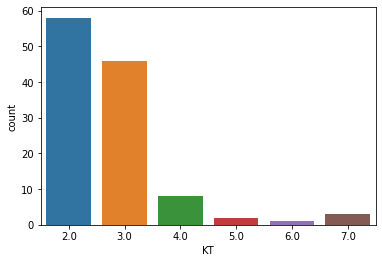

In [67]:
sns.countplot(data=df3, x='KT')

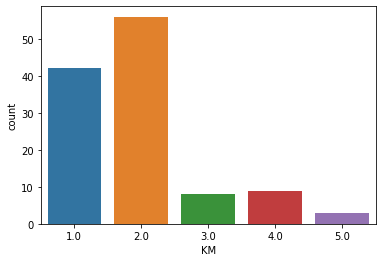

In [68]:
sns.countplot(data=df3, x='KM')

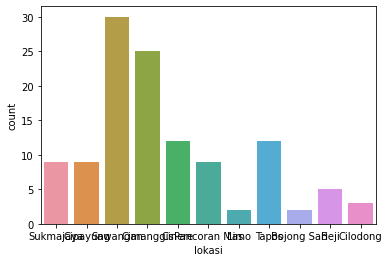

In [69]:
sns.countplot(data=df3, x='lokasi')

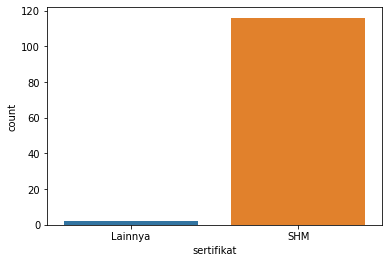

In [70]:
sns.countplot(data=df3, x='sertifikat')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


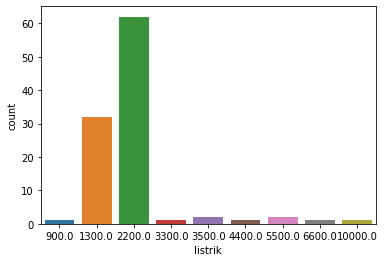

In [71]:
sns.countplot(data=df3, x='listrik')

Dari output countplot di atas, kita dapat menarik informasi bahwa:
* Jumlah kamar todur yang ada biasanya 2-3 kamar dan tidak ada rumah yang hanya memiliki 1 kamar
* Tiap rumah biasanya terdapat 1-2 kamar mandi
* Hampir semua unit telah memiliki SHM
* Daya listrik paling banyak digunakan adalah 1300 dan 2200 watt

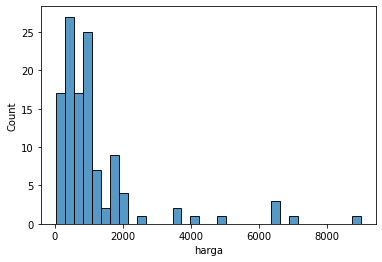

In [72]:
sns.histplot(data=df3, x='harga')

# Jakarta

## Preprocessing

In [73]:
df4.sample(8)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
49,06-12-2021,90.0,102.0,4.0,3.0,NaN,NaN,Jakarta Barat,PPJB,4400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   121 non-null    object 
 1   LT           121 non-null    float64
 2   LB           121 non-null    float64
 3   KT           121 non-null    float64
 4   KM           121 non-null    float64
 5   garasi       44 non-null     float64
 6   carport      90 non-null     float64
 7   lokasi       121 non-null    object 
 8   sertifikat   119 non-null    object 
 9   listrik      120 non-null    float64
 10  hadap        36 non-null     object 
 11  harga        121 non-null    float64
 12  URL          121 non-null    object 
 13  deskripsi    112 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unname

In [75]:
# Menghapus kolom yang berisi NaN di semua barisnya
df4.dropna(axis=1, how='all', inplace=True)

# Menghapus baris yang berisi NaN di semua kolomnya
df4.dropna(axis=0, how='all', inplace=True)

df4.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...
120,06-12-2021,144.0,250.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM,3500.0,Timur,2.250000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Modern Minimalis dengan 2 lantai di Jati...


In [76]:
# Menghitung banyaknya data terduplikat
df4.duplicated().sum()

0

In [77]:
# Menghitung data NaN tiap kolom
df4.isna().sum()

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi        77
carport       31
lokasi         0
sertifikat     2
listrik        1
hadap         85
harga          0
URL            0
deskripsi      9
dtype: int64

In [78]:
# Menghitung presentase data NaN tiap kolom
(df4.isna().sum()/len(df4)*100).to_frame('presentase missing')

,presentase missing
created_at,0.000000
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.000000
garasi,63.636364
carport,25.619835
lokasi,0.000000
sertifikat,1.652893
listrik,0.826446


In [79]:
# Karena dirasa sudah tidak diperlukan, kolom 'created_at', 'URL' dan 'deskripsi' dihapus
df4.drop(['created_at','URL','deskripsi'], axis=1, inplace=True)

In [80]:
print('LT: ',len(set(df4.LT)), set(df4.LT))
print('LB: ',len(set(df4.LB)), set(df4.LB))
print('KT: ',len(set(df4.KT)), set(df4.KT))
print('KM: ',len(set(df4.KM)), set(df4.KM))
print('Garasi: ',len(set(df4.garasi)), set(df4.garasi))
print('Carport: ',len(set(df4.carport)), set(df4.carport))
print('Lokasi: ',len(set(df4.lokasi)), set(df4.lokasi))
print('Sertifikat: ',len(set(df4.sertifikat)), set(df4.sertifikat))
print('Listrik: ',len(set(df4.listrik)), set(df4.listrik))
print('Hadap: ',len(set(df4.hadap)), set(df4.hadap))

LT:  93 {16.0, 18.0, 19.0, 21.0, 23.0, 24.0, 30.0, 33.0, 36.0, 45.0, 47.0, 49.0, 50.0, 52.0, 60.0, 67.0, 69.0, 70.0, 71.0, 72.0, 75.0, 79.0, 80.0, 84.0, 597.0, 85.0, 86.0, 90.0, 95.0, 96.0, 97.0, 98.0, 612.0, 100.0, 109.0, 112.0, 119.0, 120.0, 122.0, 124.0, 128.0, 640.0, 130.0, 135.0, 652.0, 140.0, 144.0, 147.0, 150.0, 153.0, 160.0, 162.0, 168.0, 170.0, 175.0, 695.0, 184.0, 700.0, 189.0, 200.0, 202.0, 205.0, 719.0, 217.0, 220.0, 225.0, 738.0, 232.0, 239.0, 240.0, 243.0, 250.0, 260.0, 790.0, 290.0, 300.0, 315.0, 317.0, 320.0, 840.0, 330.0, 3422.0, 863.0, 375.0, 390.0, 400.0, 424.0, 432.0, 950.0, 485.0, 1000.0, 500.0, 511.0}
LB:  87 {512.0, 529.0, 21.0, 31.0, 32.0, 33.0, 35.0, 36.0, 37.0, 550.0, 39.0, 40.0, 42.0, 45.0, 46.0, 48.0, 55.0, 57.0, 60.0, 64.0, 69.0, 71.0, 72.0, 75.0, 80.0, 82.0, 83.0, 600.0, 90.0, 97.0, 98.0, 102.0, 105.0, 110.0, 115.0, 126.0, 134.0, 135.0, 650.0, 140.0, 657.0, 150.0, 154.0, 156.0, 160.0, 170.0, 1200.0, 178.0, 180.0, 700.0, 190.0, 198.0, 200.0, 202.0, 216.0, 2

In [81]:
# Mengubah tipe variabel menjadi kategorik
df4['KT'] = df4['KT'].astype('category')
df4['KM'] = df4['KM'].astype('category')
df4['lokasi'] = df4['lokasi'].astype('category')
df4['sertifikat'] = df4['sertifikat'].astype('category')
df4['listrik'] = df4['listrik'].astype('category')
df4['hadap'] = df4['hadap'].astype('category')

In [82]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 120
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          121 non-null    float64 
 1   LB          121 non-null    float64 
 2   KT          121 non-null    category
 3   KM          121 non-null    category
 4   garasi      44 non-null     float64 
 5   carport     90 non-null     float64 
 6   lokasi      121 non-null    category
 7   sertifikat  119 non-null    category
 8   listrik     120 non-null    category
 9   hadap       36 non-null     category
 10  harga       121 non-null    float64 
dtypes: category(6), float64(5)
memory usage: 8.7 KB


## EDA & Visualisasi

In [83]:
df4.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
count,121.000000,121.000000,121.0,121.0,44.000000,90.000000,121,119,120.0,36,1.210000e+02
unique,NaN,NaN,9.0,7.0,NaN,NaN,5,7,21.0,10,NaN
top,NaN,NaN,5.0,3.0,NaN,NaN,Jakarta Barat,SHM,2200.0,Timur,NaN
freq,NaN,NaN,31.0,29.0,NaN,NaN,25,90,41.0,10,NaN
mean,247.586777,279.495868,NaN,NaN,1.863636,1.955556,NaN,NaN,NaN,NaN,8.985955e+09
std,368.384642,285.275631,NaN,NaN,1.518734,1.475730,NaN,NaN,NaN,NaN,1.587610e+10
min,16.000000,21.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,3.800000e+08
25%,84.000000,97.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1.600000e+09
50%,135.000000,200.000000,NaN,NaN,1.000000,2.000000,NaN,NaN,NaN,NaN,3.400000e+09
75%,250.000000,350.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,7.250000e+09


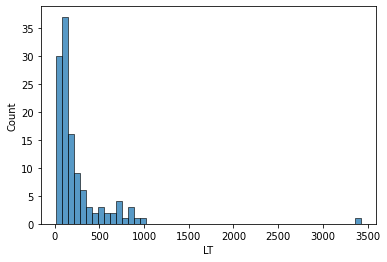

In [84]:
# Distribusi luas tanah
sns.histplot(data=df4, x='LT')

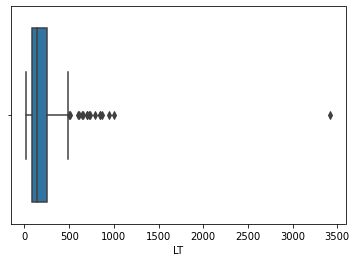

In [85]:
sns.boxplot(data=df4, x='LT')

In [86]:
df4.loc[df4['LT']>3000]

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
14,3422.0,64.0,1.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.050000e+09


Perumahan di Jakarta menawarkan luas tanah yang lebih besar dari daerah lain yakni mayoritas di bawah 250 meter persegi, tapi ada bangunan hanya dengan luas tanah 16 meter persegi. Ada juga data yang perlu divalidasi lagi, yakni data dengan index 14.

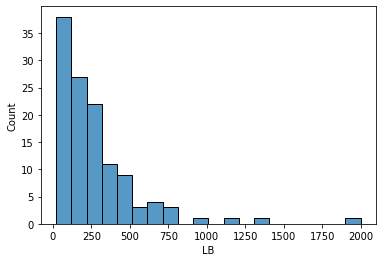

In [87]:
# Distribusi luas bangunan
sns.histplot(data=df4, x='LB')

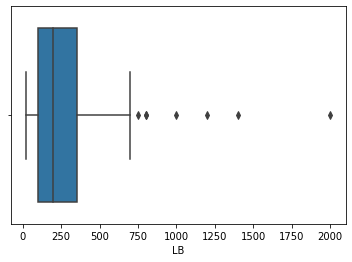

In [88]:
sns.boxplot(data=df4, x='LB')

In [89]:
df4.loc[df4['LB']>1800]

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
21,700.0,2000.0,10.0,10.0,NaN,10.0,Jakarta Pusat,SHM,66000.0,Utara,1.050000e+11


Sejalan dengan luas tanah yang besar, bangunan di jakarta juga memiliki luas bangunan yang besar, yakni mayoritas bangunannya memiliki luas di bawah 300 meter persegi. Terdapat beberapa outlier yang dapat dianalisis lebih lanjut untuk mengetahui informasi yang lebih mendalam.

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


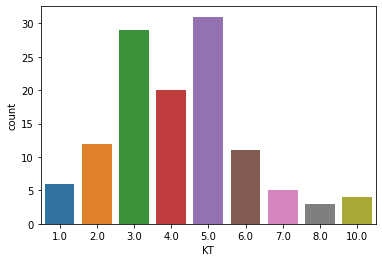

In [90]:
sns.countplot(data=df4, x='KT')

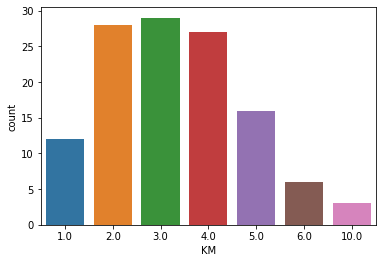

In [91]:
sns.countplot(data=df4, x='KM')

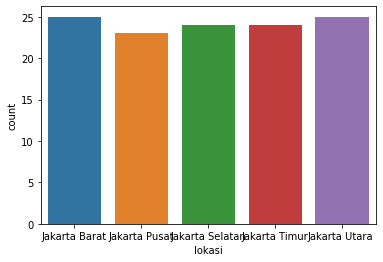

In [92]:
sns.countplot(data=df4, x='lokasi')

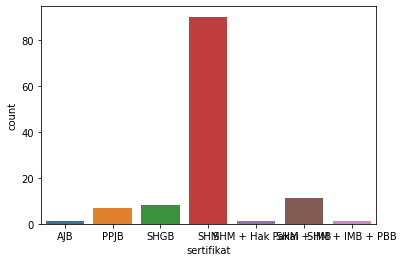

In [93]:
sns.countplot(data=df4, x='sertifikat')

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


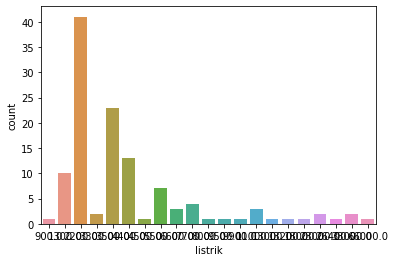

In [94]:
sns.countplot(data=df4, x='listrik')

Beberapa informasi yang dapat kita ambil dari output di atas adalah:

* Jumlah kamar tidur lebih banyak dari daerah lain yakni mayoritas ada 3-5 kamar
* Kamar mandi tiap rumah juga biasanya berkisar antara 2-4 kamar mandi, bahkan ada yang memiliki 10 kamar mandi
* Lokasi rumah tersebar di 5 wilayah di Jakarta secara merata
* Mayoritas telah memiliki SHM

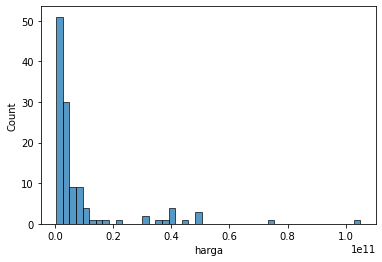

In [95]:
sns.histplot(data=df4, x='harga')

# Tangerang

## Preprocessing

In [96]:
df5.sample(8)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
112,12-08-2021,66.0,37.0,2.0,1.0,NaN,1.0,"RAWAKALONG, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,12-06-2021,128.0,88.0,3.0,3.0,NaN,1.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,12-06-2021,160.0,120.0,3.0,2.0,NaN,1.0,"BSD, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,12-06-2021,78.0,125.0,4.0,2.0,NaN,1.0,"BSD DUTA BINTARO, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,12-06-2021,48.0,62.0,2.0,2.0,NaN,1.0,"GADING SERPONG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12-06-2021,37.0,72.0,2.0,1.0,1.0,1.0,"MAUK, TANGERANG",HGB,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,12-06-2021,230.0,370.0,4.0,4.0,NaN,NaN,"CISAUK, TANGERANG",HGB,3500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   124 non-null    object 
 1   LT           124 non-null    float64
 2   LB           124 non-null    float64
 3   KT           124 non-null    float64
 4   KM           124 non-null    float64
 5   garasi       38 non-null     float64
 6   carport      92 non-null     float64
 7   lokasi       124 non-null    object 
 8   sertifikat   122 non-null    object 
 9   listrik      111 non-null    float64
 10  hadap        49 non-null     object 
 11  harga        124 non-null    float64
 12  URL          124 non-null    object 
 13  deskripsi    124 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [98]:
# Menghapus kolom yang berisi NaN di semua barisnya
df5.dropna(axis=1, how='all', inplace=True)

# Menghapus baris yang berisi NaN di semua kolomnya
df5.dropna(axis=0, how='all', inplace=True)

df5.tail()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,NaN,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,NaN,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,Barat,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,NaN,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,NaN,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [99]:
# Menghitung banyaknya data terduplikat
df5.duplicated().sum()

0

In [100]:
# Menghitung data NaN tiap kolom
df5.isna().sum()

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi        86
carport       32
lokasi         0
sertifikat     2
listrik       13
hadap         75
harga          0
URL            0
deskripsi      0
dtype: int64

In [101]:
# Menghitung presentase data NaN tiap kolom
(df5.isna().sum()/len(df5)*100).to_frame('presentase missing')

,presentase missing
created_at,0.000000
LT,0.000000
LB,0.000000
KT,0.000000
KM,0.000000
garasi,69.354839
carport,25.806452
lokasi,0.000000
sertifikat,1.612903
listrik,10.483871


In [102]:
# Karena dirasa sudah tidak diperlukan, kolom 'created_at', 'URL' dan 'deskripsi' dihapus
df5.drop(['created_at','URL','deskripsi'], axis=1, inplace=True)

In [103]:
print('LT: ',len(set(df5.LT)), set(df5.LT))
print('LB: ',len(set(df5.LB)), set(df5.LB))
print('KT: ',len(set(df5.KT)), set(df5.KT))
print('KM: ',len(set(df5.KM)), set(df5.KM))
print('Garasi: ',len(set(df5.garasi)), set(df5.garasi))
print('Carport: ',len(set(df5.carport)), set(df5.carport))
print('Lokasi: ',len(set(df5.lokasi)), set(df5.lokasi))
print('Sertifikat: ',len(set(df5.sertifikat)), set(df5.sertifikat))
print('Listrik: ',len(set(df5.listrik)), set(df5.listrik))
print('Hadap: ',len(set(df5.hadap)), set(df5.hadap))

LT:  63 {128.0, 385.0, 136.0, 265.0, 3087.0, 144.0, 276.0, 534.0, 151.0, 150.0, 153.0, 155.0, 160.0, 288.0, 162.0, 37.0, 295.0, 170.0, 300.0, 48.0, 50.0, 180.0, 308.0, 184.0, 315.0, 60.0, 189.0, 320.0, 66.0, 72.0, 200.0, 202.0, 76.0, 205.0, 78.0, 335.0, 77.0, 84.0, 216.0, 90.0, 474.0, 91.0, 93.0, 94.0, 375.0, 96.0, 224.0, 98.0, 99.0, 230.0, 105.0, 234.0, 108.0, 365.0, 240.0, 625.0, 241.0, 113.0, 112.0, 373.0, 118.0, 119.0, 250.0}
LB:  69 {130.0, 136.0, 138.0, 140.0, 142.0, 272.0, 400.0, 148.0, 150.0, 153.0, 27.0, 155.0, 29.0, 160.0, 36.0, 37.0, 40.0, 298.0, 300.0, 45.0, 48.0, 50.0, 180.0, 52.0, 54.0, 55.0, 184.0, 441.0, 60.0, 62.0, 190.0, 66.0, 450.0, 2500.0, 70.0, 72.0, 200.0, 75.0, 80.0, 82.0, 85.0, 88.0, 89.0, 90.0, 91.0, 220.0, 93.0, 350.0, 375.0, 92.0, 225.0, 100.0, 360.0, 1000.0, 105.0, 108.0, 492.0, 110.0, 240.0, 370.0, 500.0, 117.0, 119.0, 120.0, 250.0, 123.0, 380.0, 125.0, 255.0}
KT:  6 {2.0, 3.0, 4.0, 5.0, 6.0, 8.0}
KM:  7 {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 8.0}
Garasi:  92 {nan,

In [104]:
# Mengubah tipe variabel menjadi kategorik
df5['KT'] = df5['KT'].astype('category')
df5['KM'] = df5['KM'].astype('category')
df5['sertifikat'] = df5['sertifikat'].astype('category')
df5['listrik'] = df5['listrik'].astype('category')
df5['hadap'] = df5['hadap'].astype('category')

In [105]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LT          124 non-null    float64 
 1   LB          124 non-null    float64 
 2   KT          124 non-null    category
 3   KM          124 non-null    category
 4   garasi      38 non-null     float64 
 5   carport     92 non-null     float64 
 6   lokasi      124 non-null    object  
 7   sertifikat  122 non-null    category
 8   listrik     111 non-null    category
 9   hadap       49 non-null     category
 10  harga       124 non-null    float64 
dtypes: category(5), float64(5), object(1)
memory usage: 8.8+ KB


## EDA & Visualisasi

In [106]:
df5.describe(include='all')

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
count,124.000000,124.000000,124.0,124.0,38.000000,92.000000,124,122,111.0,49,124.000000
unique,NaN,NaN,6.0,7.0,NaN,NaN,41,3,12.0,7,NaN
top,NaN,NaN,3.0,2.0,NaN,NaN,"BSD, TANGERANG",SHM,2200.0,Utara,NaN
freq,NaN,NaN,57.0,48.0,NaN,NaN,27,96,60.0,18,NaN
mean,202.653226,199.491935,NaN,NaN,2.210526,1.608696,NaN,NaN,NaN,NaN,3849.556452
std,285.219301,264.097681,NaN,NaN,1.862255,1.222109,NaN,NaN,NaN,NaN,9316.413817
min,37.000000,27.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,95.000000
25%,90.000000,81.500000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,1037.500000
50%,150.500000,125.000000,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1950.000000
75%,250.000000,240.000000,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,3775.000000


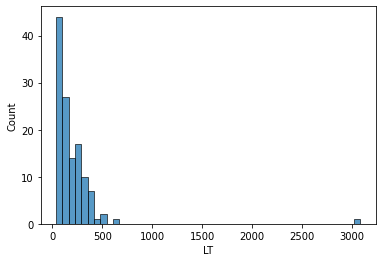

In [107]:
# Distribusi luas tanah
sns.histplot(data=df5, x='LT')

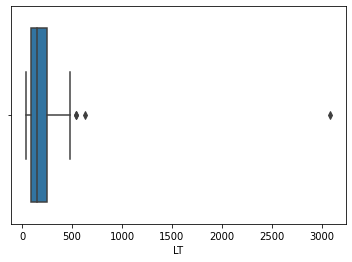

In [108]:
sns.boxplot(data=df5, x='LT')

In [109]:
df5.loc[df5['LT']>500]

,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
32,534.0,1000.0,5.0,6.0,6.0,2.0,"BSD, TANGERANG",SHM,16500.0,NaN,15500.0
47,625.0,500.0,5.0,3.0,NaN,2.0,"BSD, TANGERANG",SHM,5500.0,NaN,12500.0
49,534.0,1000.0,8.0,8.0,6.0,6.0,"BSD, TANGERANG",SHM,16500.0,NaN,15500.0
100,3087.0,2500.0,5.0,5.0,10.0,10.0,"BSD BUKIT GOLF, TANGERANG",NaN,66000.0,NaN,100000.0


Mayoritas perumahan di Tangerang menawarkan rumah dengan luas tanah di bawah 250 meter persegi, meski terdapat beberapa rumah dengan luas tanah di atas 500 meter persegi.

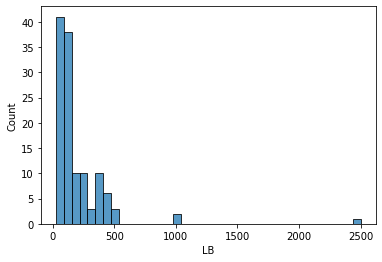

In [110]:
# Distribusi luas bangunan
sns.histplot(data=df5, x='LB')

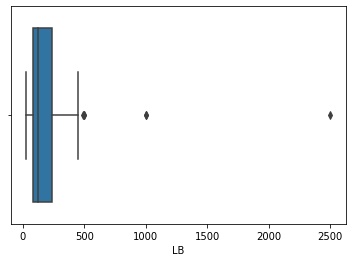

In [111]:
sns.boxplot(data=df5, x='LB')

Terlihat bahwa perumahan di Tangerang biasanya menawarkan rumah dengan luas bangunan di bawah 250 meter persegi.

/usr/local/lib/python3.8/dist-packages/pandas/io/formats/format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


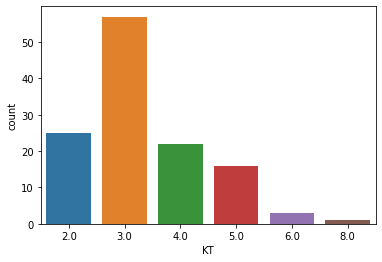

In [112]:
sns.countplot(data=df5, x='KT')

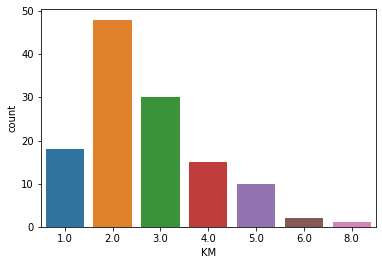

In [113]:
sns.countplot(data=df5, x='KM')

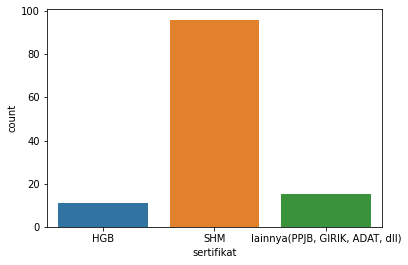

In [114]:
sns.countplot(data=df5, x='sertifikat')

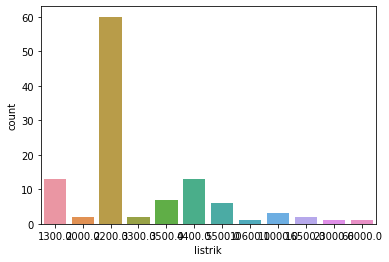

In [115]:
sns.countplot(data=df5, x='listrik')

Beberapa informasi dari countplot di atas adalah:
* Perumahan di Tangerang biasanya memiliki 3 kamar tidur
* Mayoritas terdapat 2-3 kamar mandi di tiap rumah
* Hampir seluruh rumah telah memiliki SHM
* daya listrik paling banyak digunakan adalah 2200 watt

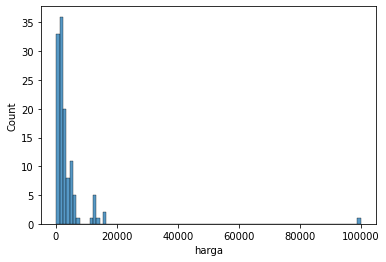

In [116]:
sns.histplot(data=df5, x='harga')

# KESIMPULAN DAN SARAN
Dari analsis di atas, saya menarik beberapa kesimpulan sebagai berikut:
* Data yang diberikan masih dalam data kotor yang perlu banyak penanganan. Sebaiknya petugas dilapangan dapat mengisi data dengan lebih baik agar tidak banyak missing value
* Mayoritas rumah dibangun di atas tanah seluas 36-100 meter persegi dengan luas bangunan kurang dari 100 meter persegi.
* Biasanya tiap rumah memiliki 2-3 kamar tidur dan 1-2 kamar mandi
* Daya listrik yang digunakan mayoritas 1300 atau 2200 watt
* Jakarta menawarkan perumahan dengan luas tanah dan bangunan yang luas
* Hampir semua rumah telah memiliki sertifikat terutama SHM